**Central Limit Theorem - Explained with Visuals**

**[CLICK HERE](https://colab.research.google.com/drive/1yrcwQiLBjfWEtr070i5mniBsPBguH7vE?usp=sharing) for this same code on Google Colab:-**

Central Limit Theorem (CLT) is one of the most crucial and foundational theorems in statistics. It is basically the bedrock of Null Hypothesis Significance Testing.

CLT says that the **"*sampling distribution of the sample statistic approaches a normal distribution as the size of the observations (n) in the sample increases towards infinity, regardless of the shape of the population distribution as long as it remains constant.*"** Lets make this concrete with an example!

Imagine you want to estimate the average height of India (and forget the men-women difference for now). Taking the height measure of all 1.4 billion people in india is impractical. So you take a **random** sample of size "n" from India, and calculate the average height in that sample. Taking a random sample makes it more likely than other methods that the sample will **represent** the population characteristics faithfully. For example if there are 50% men and 50% women in the population, the sample should also have approximately 50% men and 50% women. If the average height of the sample comes out to be 5'5'', this is your estimate of the height of the population.

Now, multiple times, you repeat the process described above. Take a random sample of size "n" and calculate the average height. The height of the sample after each process could be 5'5'', 5'4'', 5'6'', 5'4'' etc. Now you plot the distribution of these sample statistic of heights. As per CLT, as the size of "n" increases, i.e. the number of people you are taking in a sample, this distribution of average height that you plotted will reach the bell curve, i.e. the Normal Distribution.

This is amazing, beacause the height of the popultion could be distributed in any whacky manner (although height is already normally distributed in reality), the distribution of any sample statistic that you calculate (like average height) will be normally distributed, as long as you're taking a sufficently large number of cases in samples (n).

This allows us to relaibly estimate (and test hypothesis about) the parameter of a population (like height) by modelling the parameter as a normal distribution.

***Below is a visual representation of CLT. The first cell defines the function to simulate a process of multiple sampling, each of n observations, from a defined True Population Distribution. In the 2nd cell, you run the defined CLT function and can see the visual representation of CLT. It first genrates the graph of a True Population Distribution that could be of any shape as per the defined values (v) and probabilities (p). Then it generates the graph of the Sampling Distribution of Sample Means which approaches a noraml distribution (i.e. the bell curve) as you increase the size of observation within each sample (n).***

In [10]:
# import required libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [11]:
# Define the function to simulate the proof of CLT and generate visuals

def CLT(values, prob, samples = 100 , sample_of_samples = 100, ci_prct = 0.95, graphs = False):

  true_mean = round(np.average(values, weights = prob),2) #calculates true mean of the population from given values and their probabilities

  mean_lst = [] # initialising an empty list that will contain the sample means

  interval_lst = [] # initialising an empty list that will contain the defined confidence intervals as per the given ci_prct

  for i in range(0,sample_of_samples): # running a loop for sample of samples (i.e. how many times you want to repeat the process of sampling and calculating the mean)
    lst = []

    for i in range(0,samples): # Within this loop we're taking samples (n) from the true distribution and calculating its mean and confidence interval.
      lst.append(np.random.choice(values, p = prob)) # take random observation from the true distribution defined by "values" and "prob"

    mean = np.mean(lst) # calculate mean

    std = np.std(lst) # calculate standard deviation

    dof = samples - 1 # calculate degrees of freedom

    t_crit = abs(scipy.stats.t.ppf((1-ci_prct)/2, dof)) # calculate critical t-statisc for the confidenc interval based on ci_prct

    ub = mean + t_crit*(std/np.sqrt(samples)) # find upper bound of the confidence interval

    lb = mean - t_crit*(std/np.sqrt(samples)) # find lower bound of the confidence interval

    interval = {"upper_bound":ub, "lower_bound":lb} # create the confidence interval

    interval_lst.append(interval) # add the confidence interval in its list

    mean_lst.append(mean) # add the mean in its list

  dic = {"mean_list":mean_lst, "true_mean":true_mean, "interval_list":interval_lst} # create a dictionary containing the mean and confidenc interval list. Both lists contain values from each sampling procedure.

  if graphs == True:
    display(sns.barplot(x = values, y = prob), sns.displot(mean_lst)) # display the "True Distribution Graph" and "Sampling Distribution Graph"

  return dic


<Axes: >

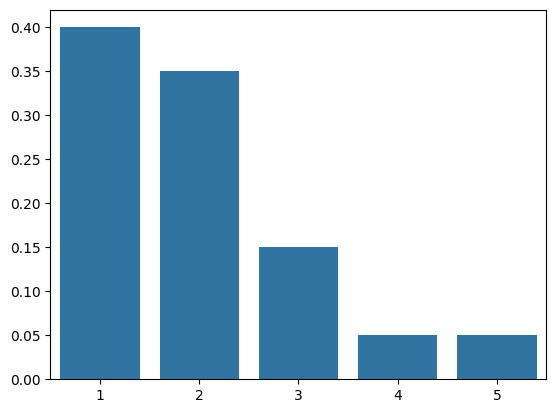

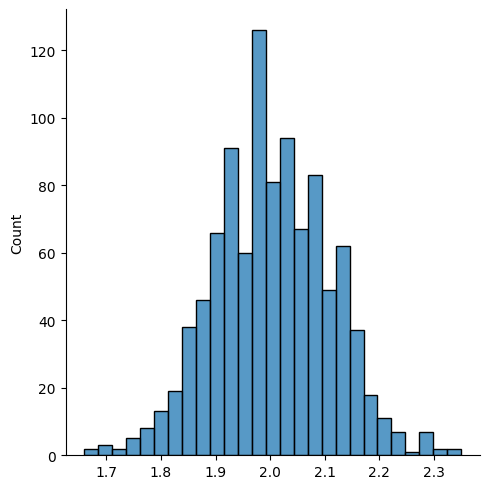

In [12]:
# Here you can define the true distribution of a process with "v" (values) and "p" (probability of each value)
# Then run the clt function to see the magic of CLT. It will do random sampling from the True Distribution, calculate the means and confidence_intervals for each sample, and generate the visual of both True Distribution and Sampling Distribution.
# The first graph created will be the True Distribution graph that, as per your defined probablities, could be of any whacky distribution. And the second graph will be the Sampling Distribution, which will start apporximating the Normal Distribution, i.e. The Bell Curve, as you make the sample size "n" bigger and bigger.

# You can start with a smaller "n = 10" or "n = 20". The second graph will not look Normally Distributed. Then you can increase n to 100 or 1000 or 5000, and see the second graph approximating a normal distribution !

v = [1,2,3,4,5] # define the values for the True Distribution of the population.

p = [0.40, 0.35, 0.15,0.05,0.05] # define the probabilities associated with each value. Remember to have the porbabilities sum up to 1.

n = 100 # define how many observations to take in one sample.

sample_of_samples = 1000 # define how many times to repeat the process of taking a sample (of size n) and calculating the statistic.

ci_prct = 0.95 # define the desired confidence interval %

clt_dic = CLT(v, p, samples = n , sample_of_samples = sample_of_samples, ci_prct = ci_prct, graphs = True) # run this and see the graphs below. It will also generate a dictionary that will contain a list of means and a list of confidence intervals. Both those list will contain the values associated with each trial.



In [13]:
# Test the confidence intervals
# X% of confidence interval means that X% of the intervals that you created, by follwoing the same method of "sampling n observations" multiple times, will contain the true population mean.
# So if above you have put ci_prct = 95% , then approximately 95% of the confidence intervals that are created will contain the True Population Mean, and running this cell will give you ~ 0.95 as the output.

ci_lst = []
for i in range(len(clt_dic["interval_list"])):
  ci_lst.append(1 if (clt_dic["true_mean"] >= clt_dic["interval_list"][i]["lower_bound"])
  & (clt_dic["true_mean"] <= clt_dic["interval_list"][i]["upper_bound"]) else 0)

np.sum(ci_lst)/len(ci_lst)

0.952